In [180]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("weight_change_dataset.csv")

In [181]:
df.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,M,228.4,3102.3,3916.0,813.7,0.2,1,Sedentary,Excellent,6,228.6
1,2,46,F,165.4,2275.5,3823.0,1547.5,2.4,6,Very Active,Excellent,6,167.8
2,3,32,F,142.8,2119.4,2785.4,666.0,1.4,7,Sedentary,Good,3,144.2
3,4,25,F,145.5,2181.3,2587.3,406.0,0.8,8,Sedentary,Fair,2,146.3
4,5,38,M,155.5,2463.8,3312.8,849.0,2.0,10,Lightly Active,Good,1,157.5


In [182]:
df.describe(include='all')

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
count,100.000000,100.000000,100,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100,100,100.000000,100.000000
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,4,4,NaN,NaN
top,NaN,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN,Lightly Active,Poor,NaN,NaN
freq,NaN,NaN,57,NaN,NaN,NaN,NaN,NaN,NaN,31,38,NaN,NaN
mean,50.500000,37.910000,NaN,171.533000,2518.206000,3518.292000,1000.091000,-2.779817,6.920000,NaN,NaN,4.810000,168.750000
std,29.011492,12.219454,NaN,30.333856,364.431221,513.313097,371.560827,7.443719,3.515277,NaN,NaN,2.576879,30.588004
min,1.000000,18.000000,NaN,100.000000,1566.500000,2030.900000,82.500000,-35.678115,1.000000,NaN,NaN,1.000000,98.200000
25%,25.750000,26.750000,NaN,153.650000,2255.050000,3233.300000,766.950000,-5.012312,4.000000,NaN,NaN,2.750000,149.550000
50%,50.500000,38.000000,NaN,172.150000,2519.500000,3636.050000,1013.100000,0.100000,7.000000,NaN,NaN,5.000000,169.800000
75%,75.250000,46.250000,NaN,192.475000,2805.975000,4000.000000,1253.325000,1.850000,10.000000,NaN,NaN,7.000000,188.300000


In [183]:
df.isnull().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

In [184]:
df.dtypes

Participant ID                     int64
Age                                int64
Gender                            object
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level           object
Sleep Quality                     object
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

In [185]:
df_encoded = df.copy()

df_encoded['Gender'] = df_encoded['Gender'].map({'M': 0, 'F': 1})

df_encoded['Physical Activity Level'] = df_encoded['Physical Activity Level'].map({'Sedentary': 0, 'Lightly Active': 1, 'Moderately Active': 2, 'Very Active': 3})

df_encoded['Sleep Quality'] = df_encoded['Sleep Quality'].map({'Poor': 0, 'Fair': 1, 'Good': 2, 'Excellent': 3})

In [186]:
df_encoded.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs)
0,1,56,0,228.4,3102.3,3916.0,813.7,0.2,1,0,3,6,228.6
1,2,46,1,165.4,2275.5,3823.0,1547.5,2.4,6,3,3,6,167.8
2,3,32,1,142.8,2119.4,2785.4,666.0,1.4,7,0,2,3,144.2
3,4,25,1,145.5,2181.3,2587.3,406.0,0.8,8,0,1,2,146.3
4,5,38,0,155.5,2463.8,3312.8,849.0,2.0,10,1,2,1,157.5


In [187]:
df_encoded.dtypes

Participant ID                     int64
Age                                int64
Gender                             int64
Current Weight (lbs)             float64
BMR (Calories)                   float64
Daily Calories Consumed          float64
Daily Caloric Surplus/Deficit    float64
Weight Change (lbs)              float64
Duration (weeks)                   int64
Physical Activity Level            int64
Sleep Quality                      int64
Stress Level                       int64
Final Weight (lbs)               float64
dtype: object

In [188]:
df_encoded.isnull().sum()

Participant ID                   0
Age                              0
Gender                           0
Current Weight (lbs)             0
BMR (Calories)                   0
Daily Calories Consumed          0
Daily Caloric Surplus/Deficit    0
Weight Change (lbs)              0
Duration (weeks)                 0
Physical Activity Level          0
Sleep Quality                    0
Stress Level                     0
Final Weight (lbs)               0
dtype: int64

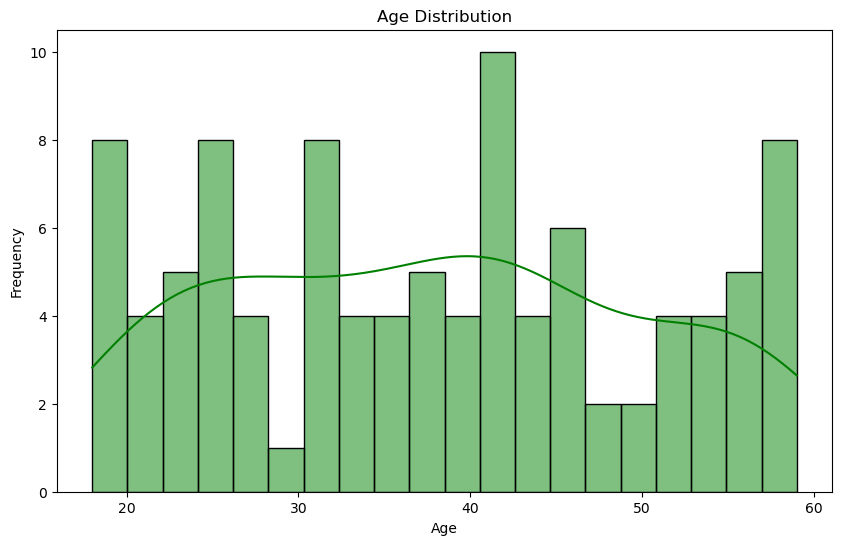

In [189]:
plt.figure(figsize=(10,6))
sns.histplot(df_encoded['Age'], bins=20, kde=True, color='green')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

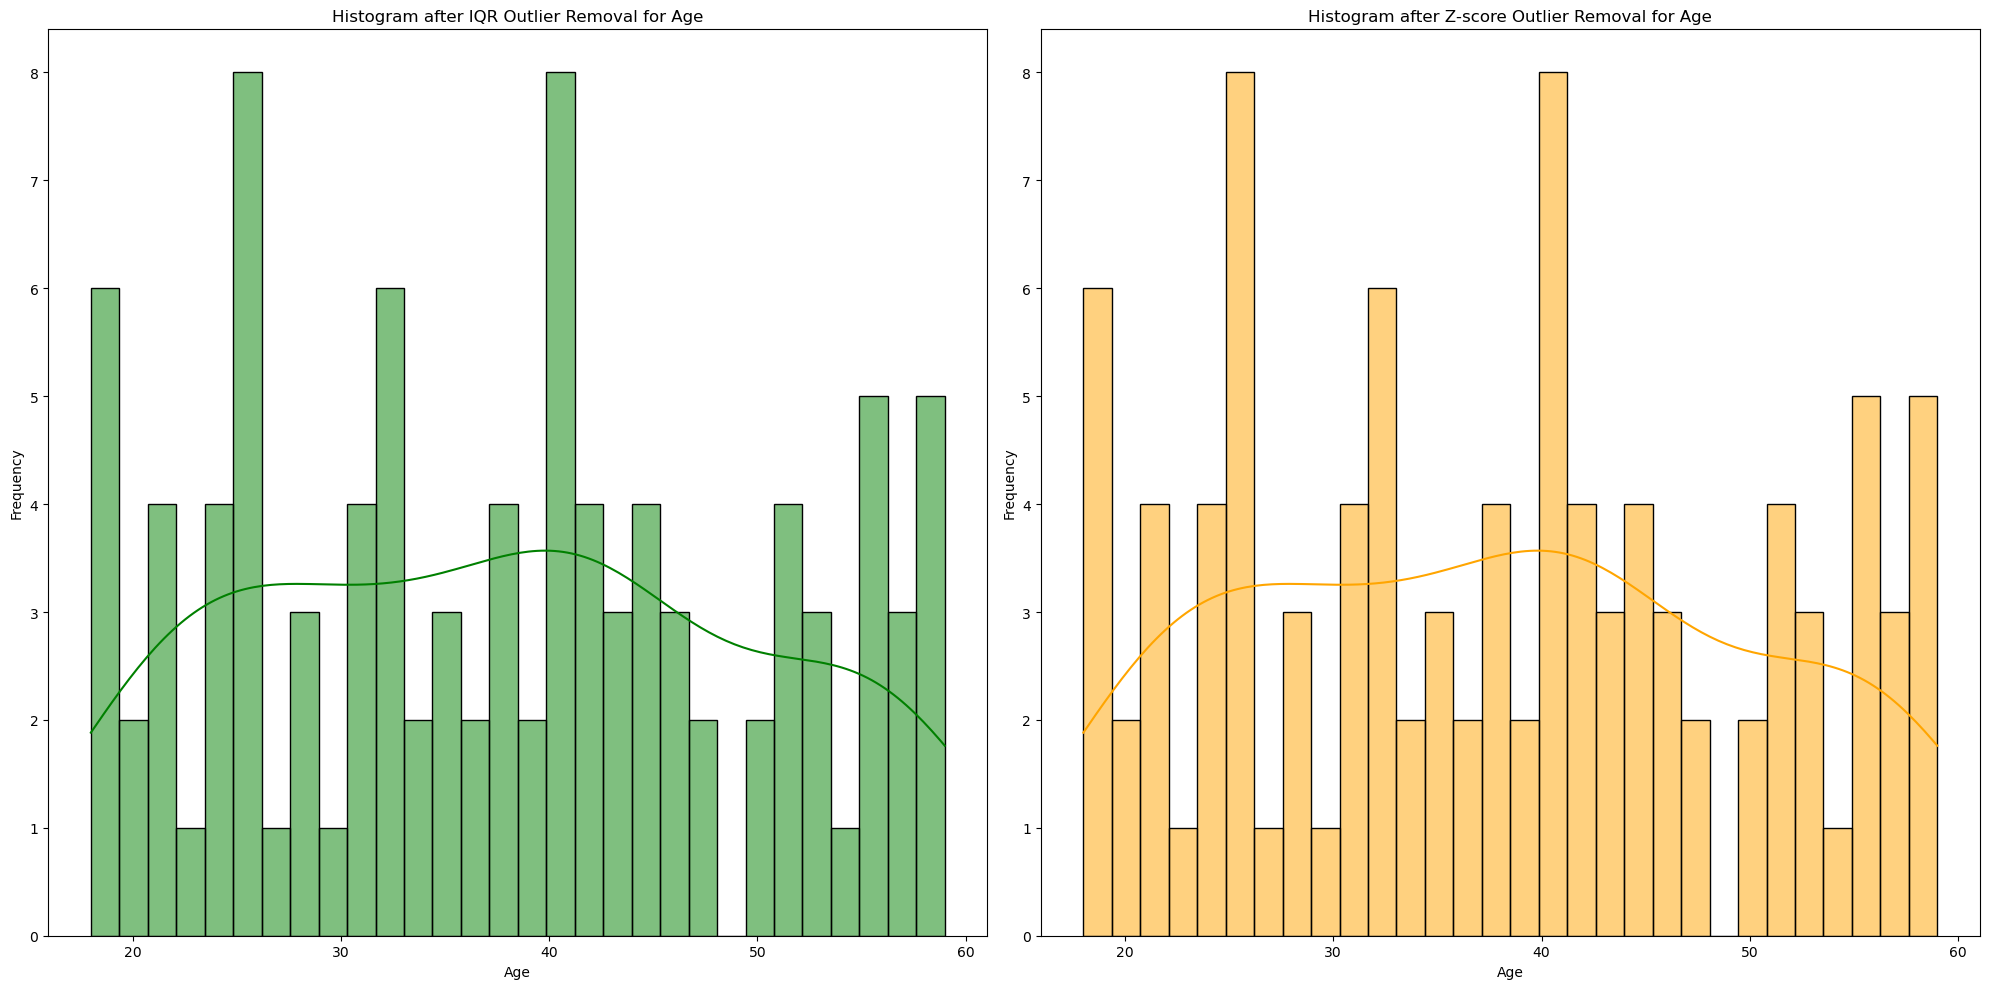

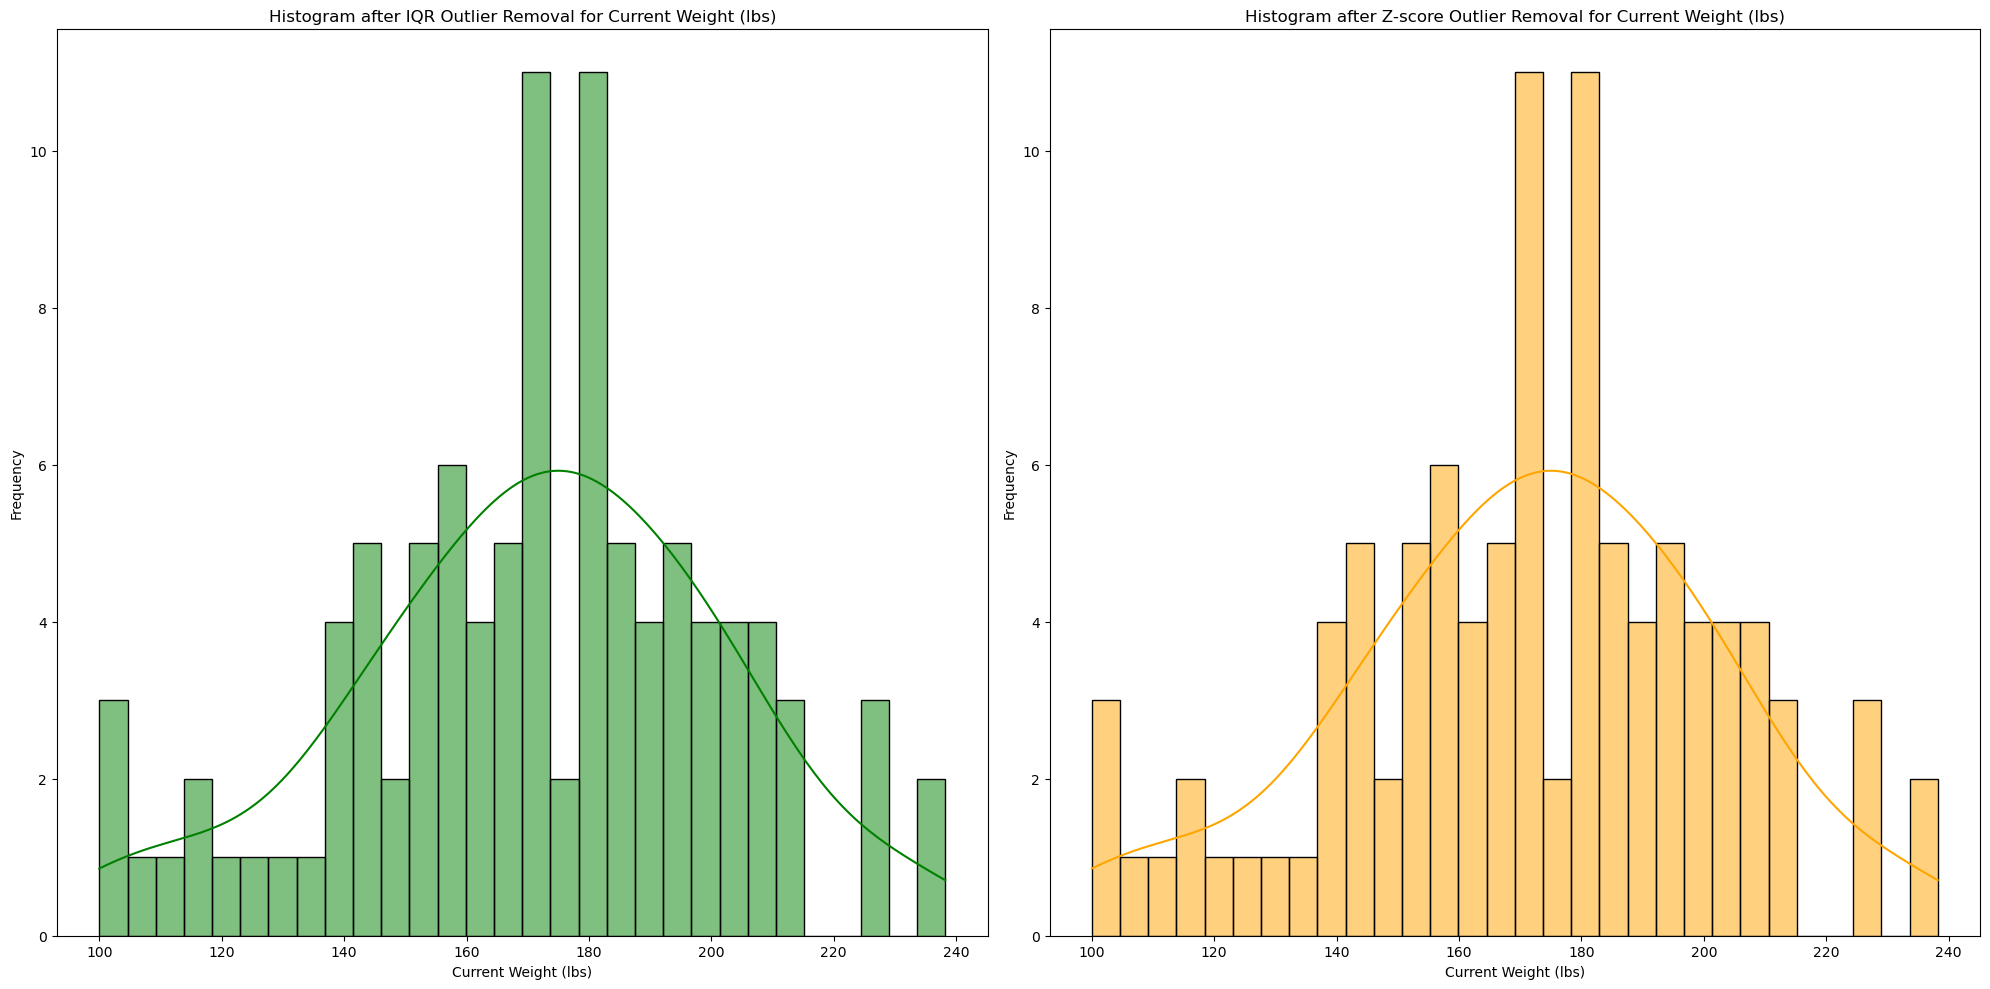

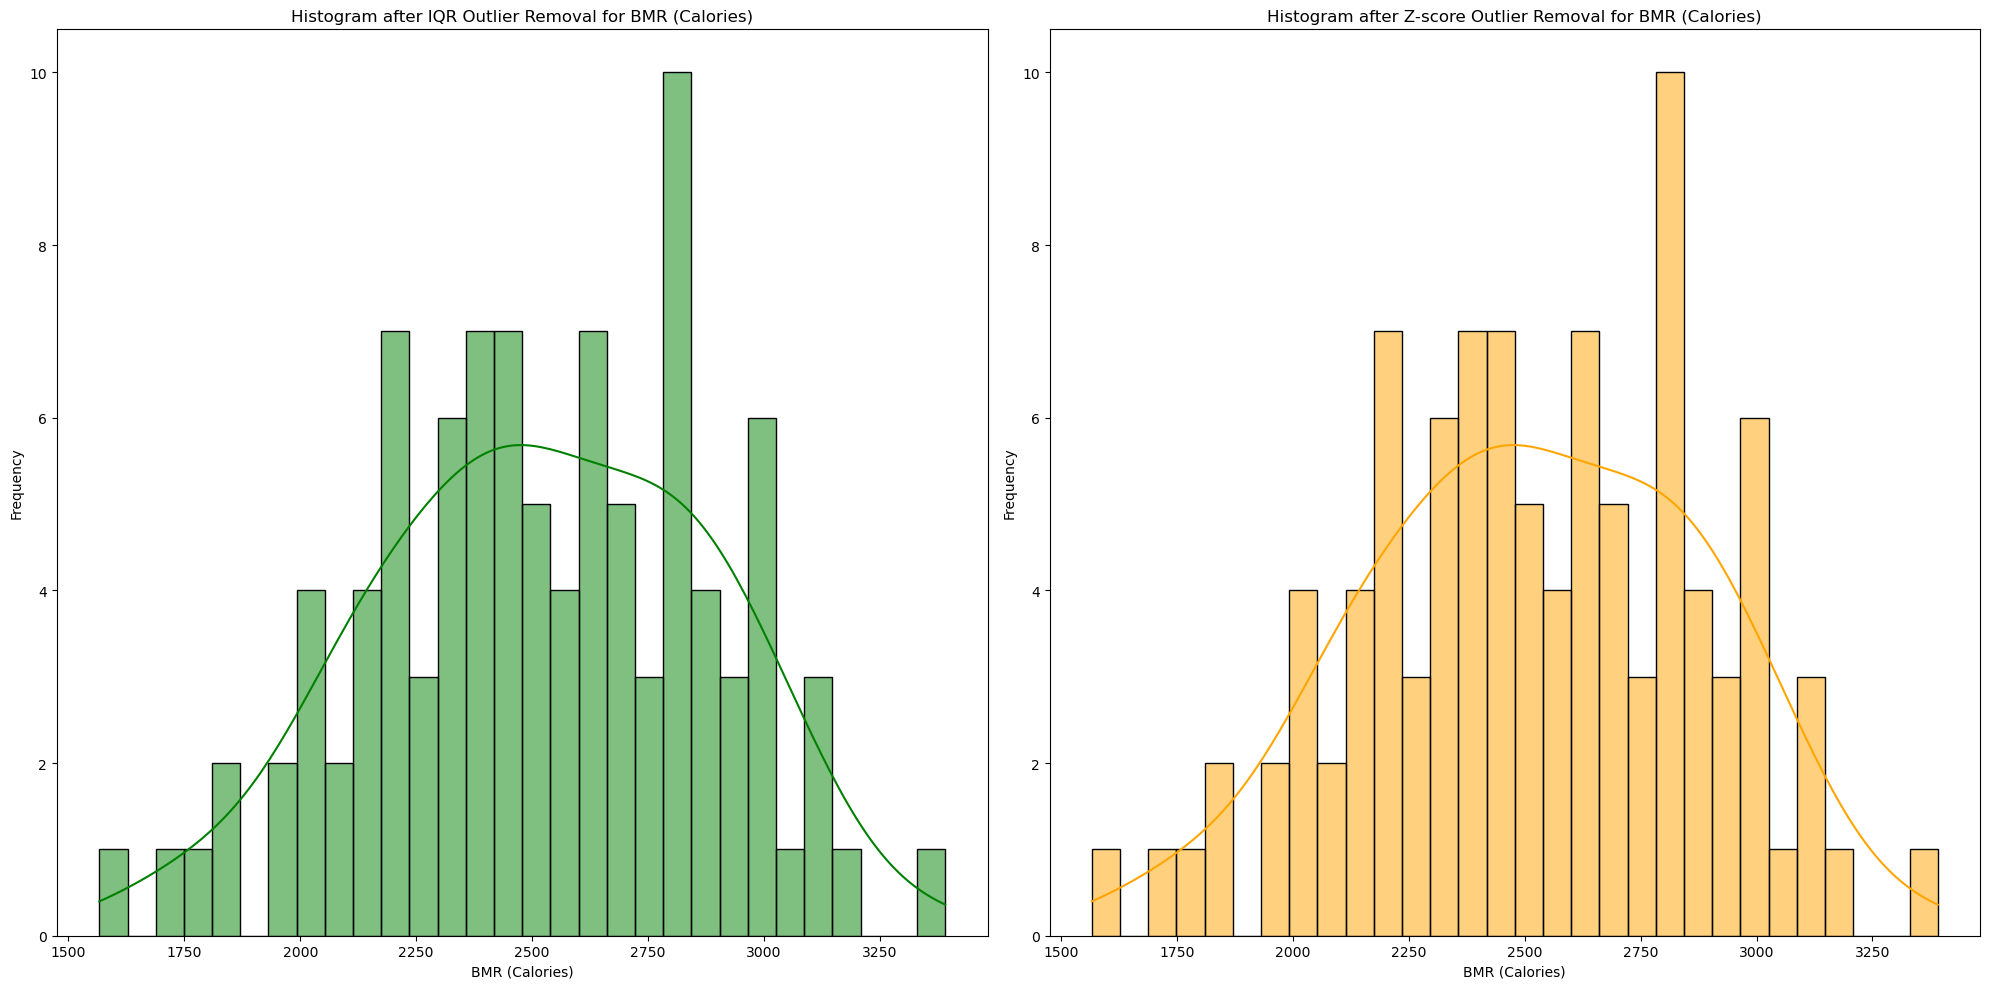

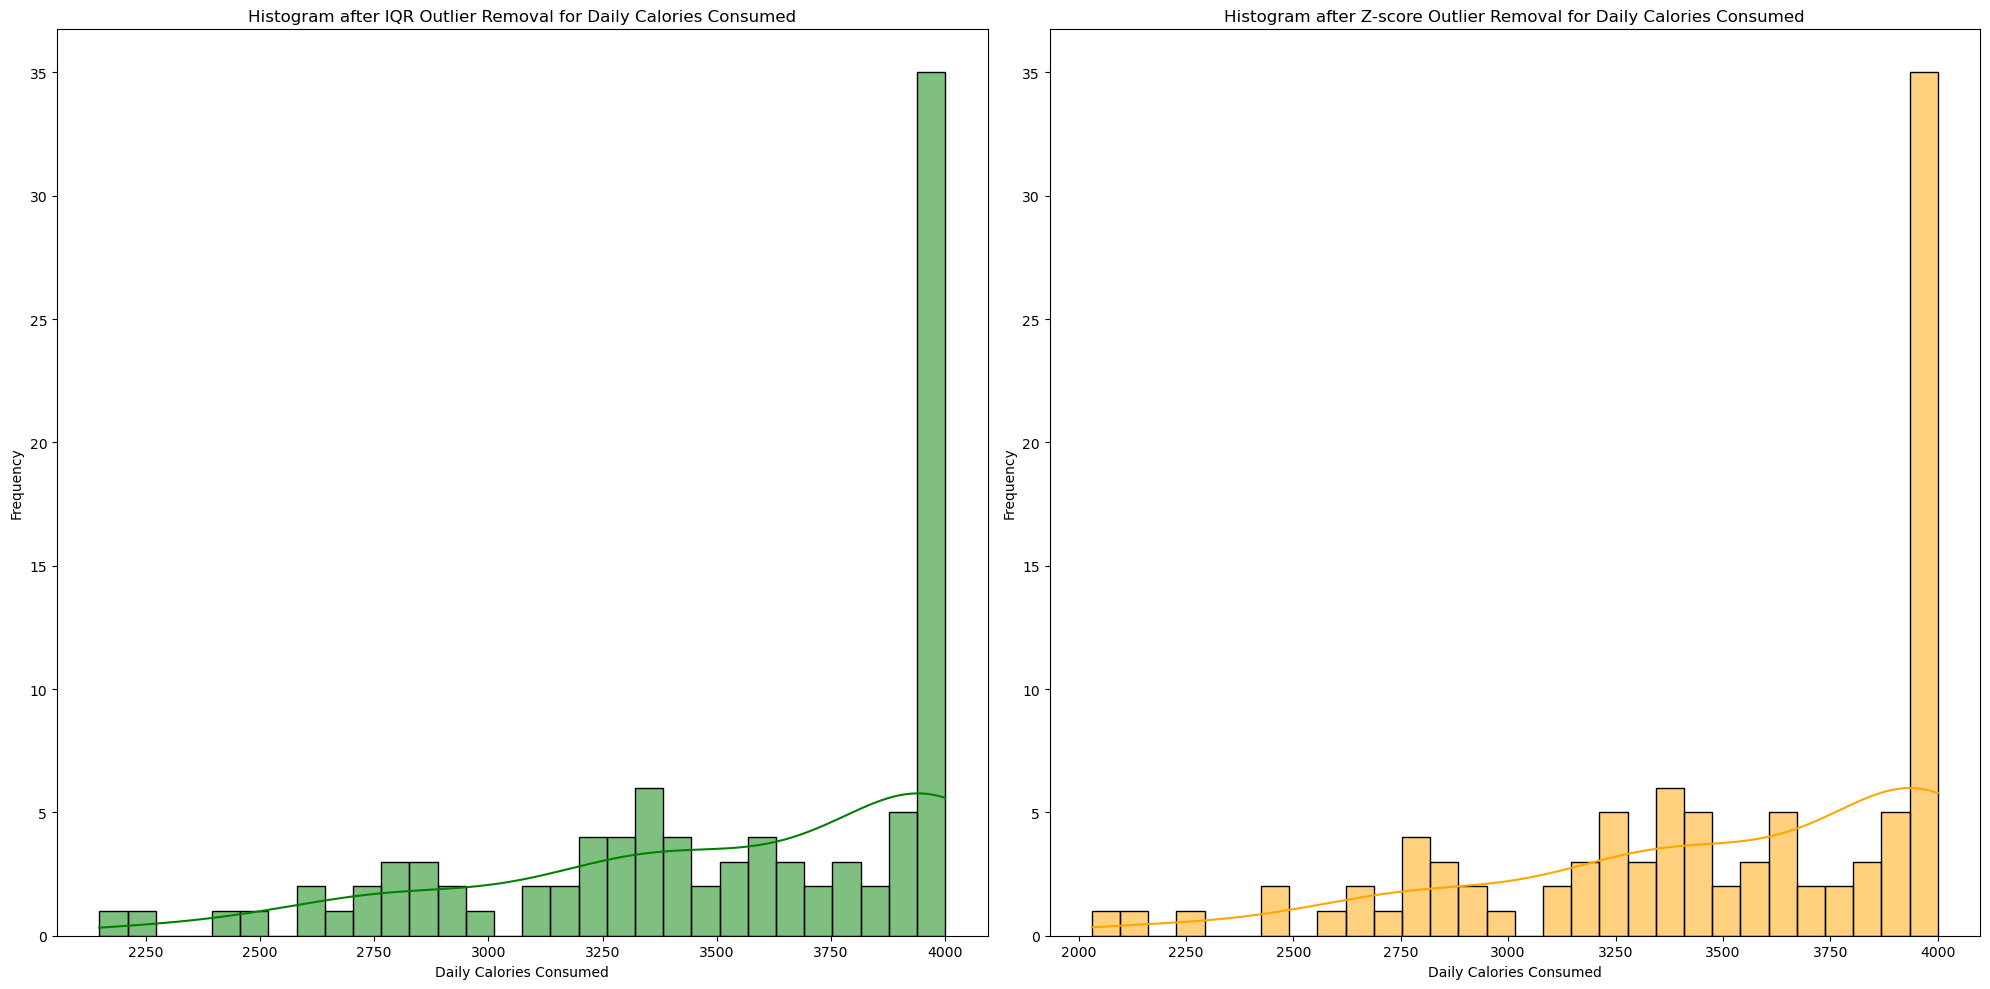

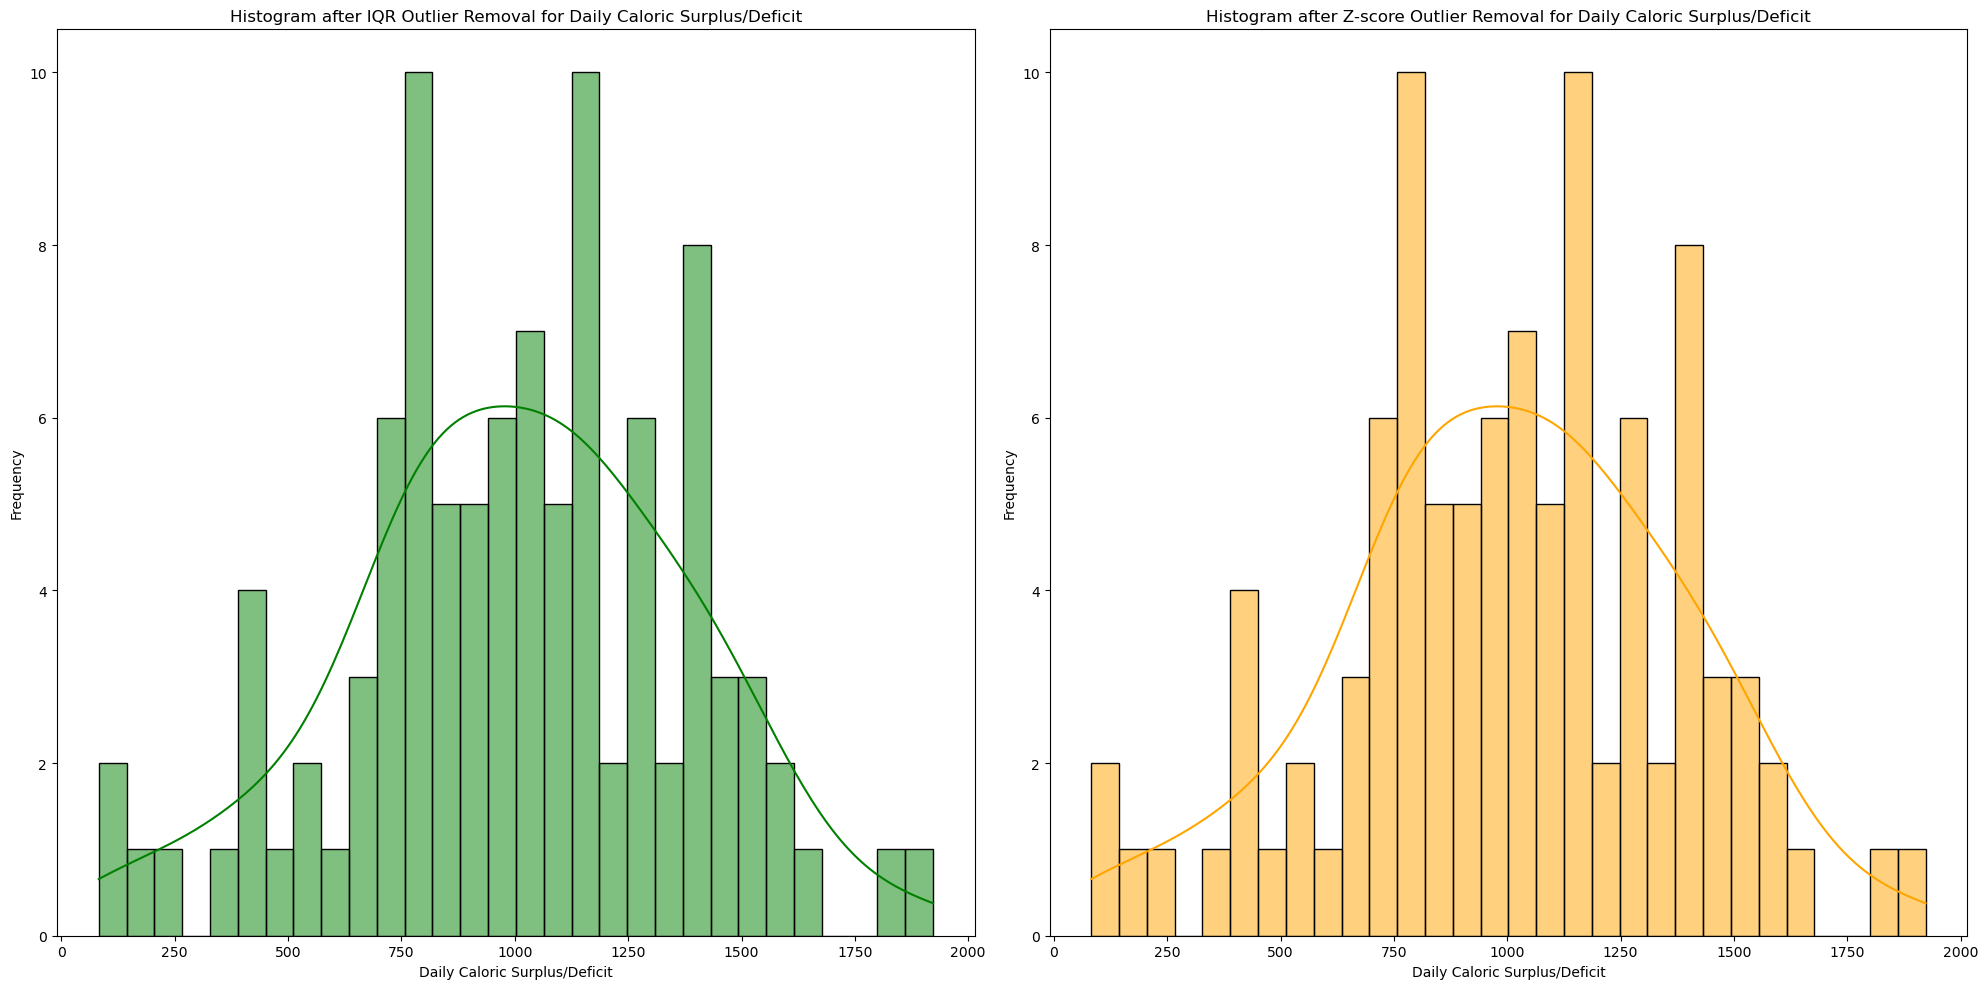

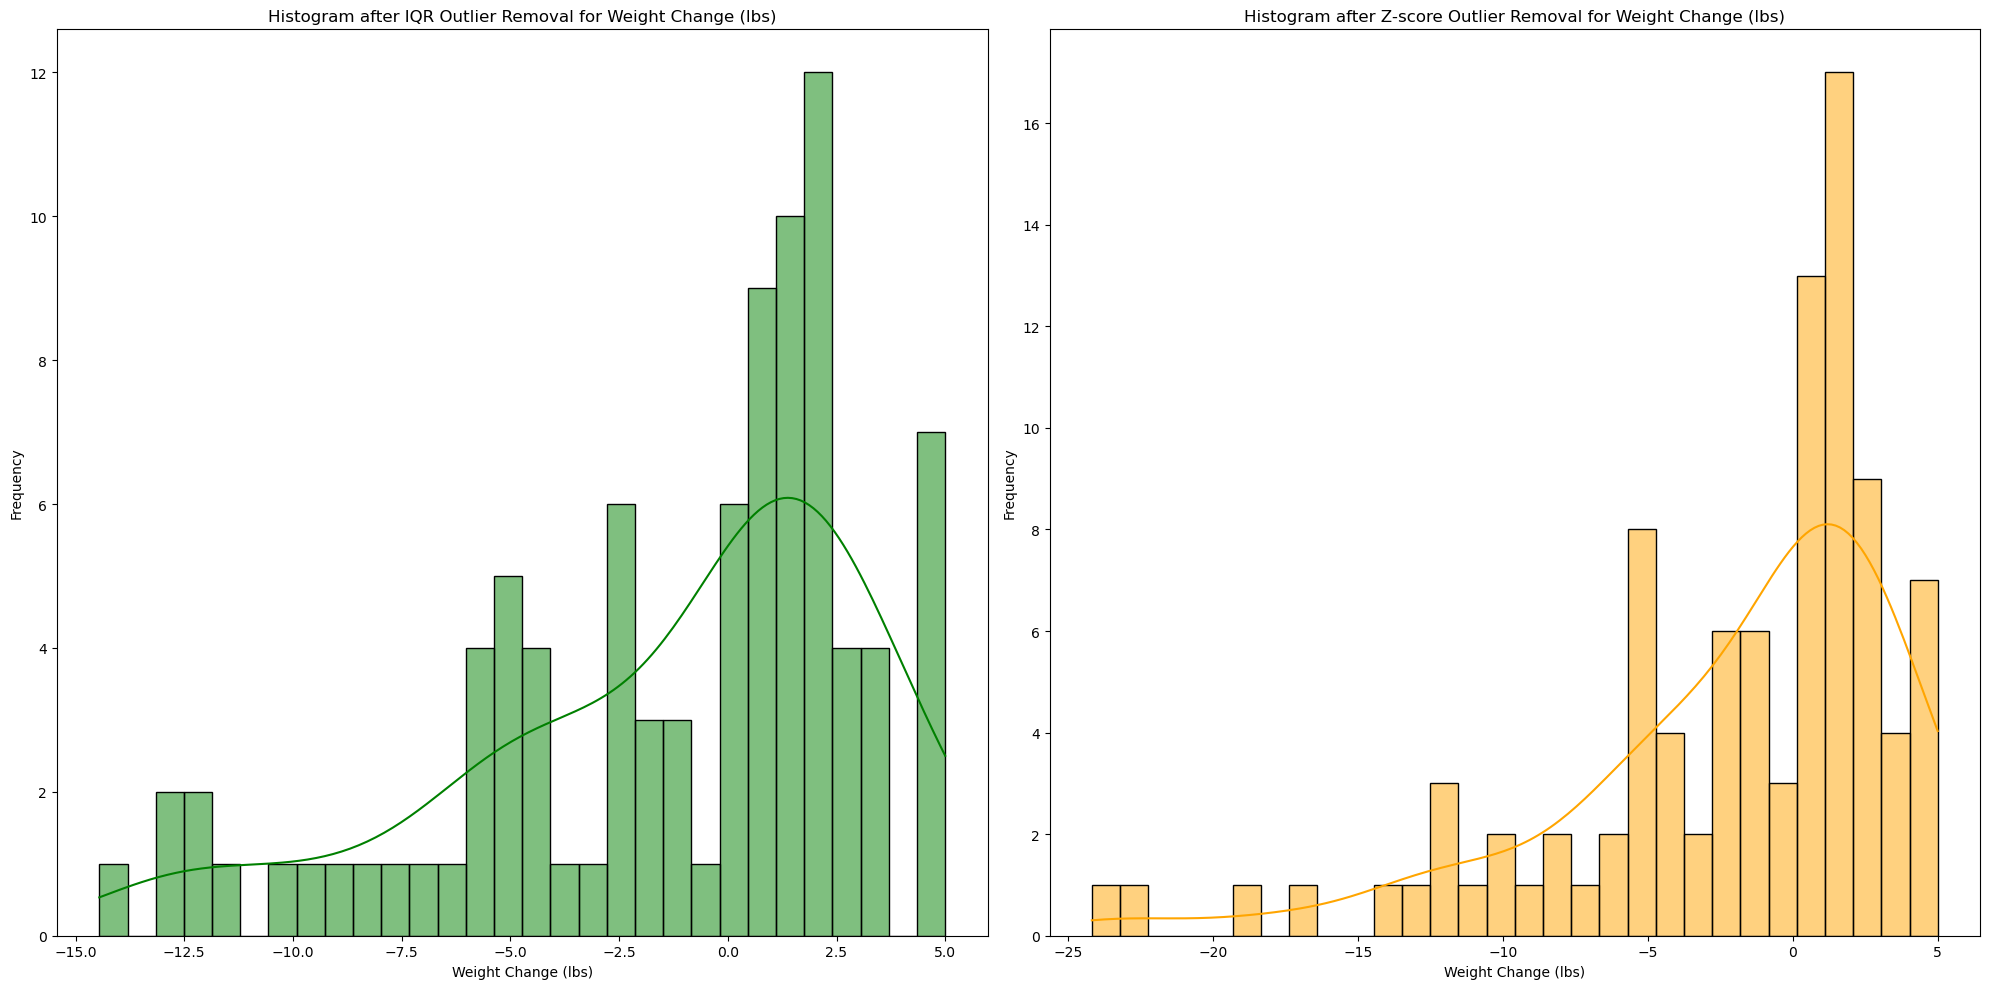

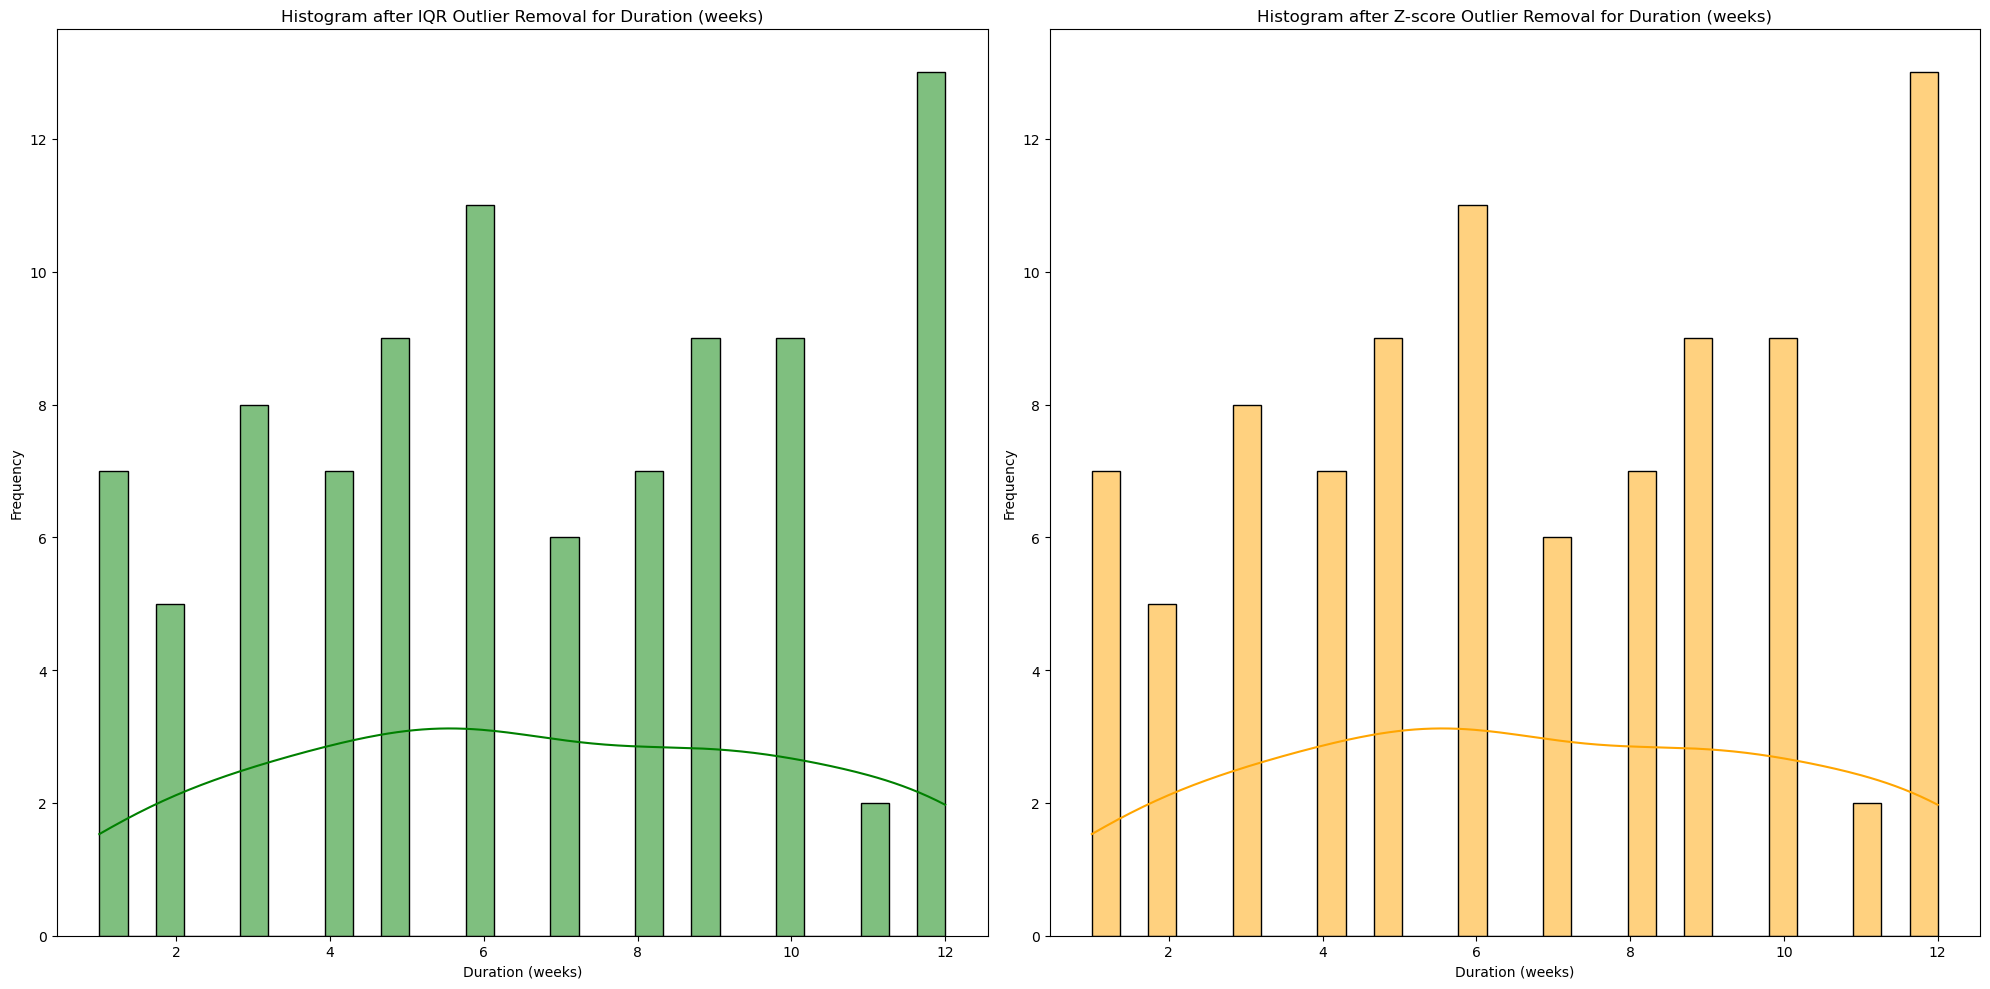

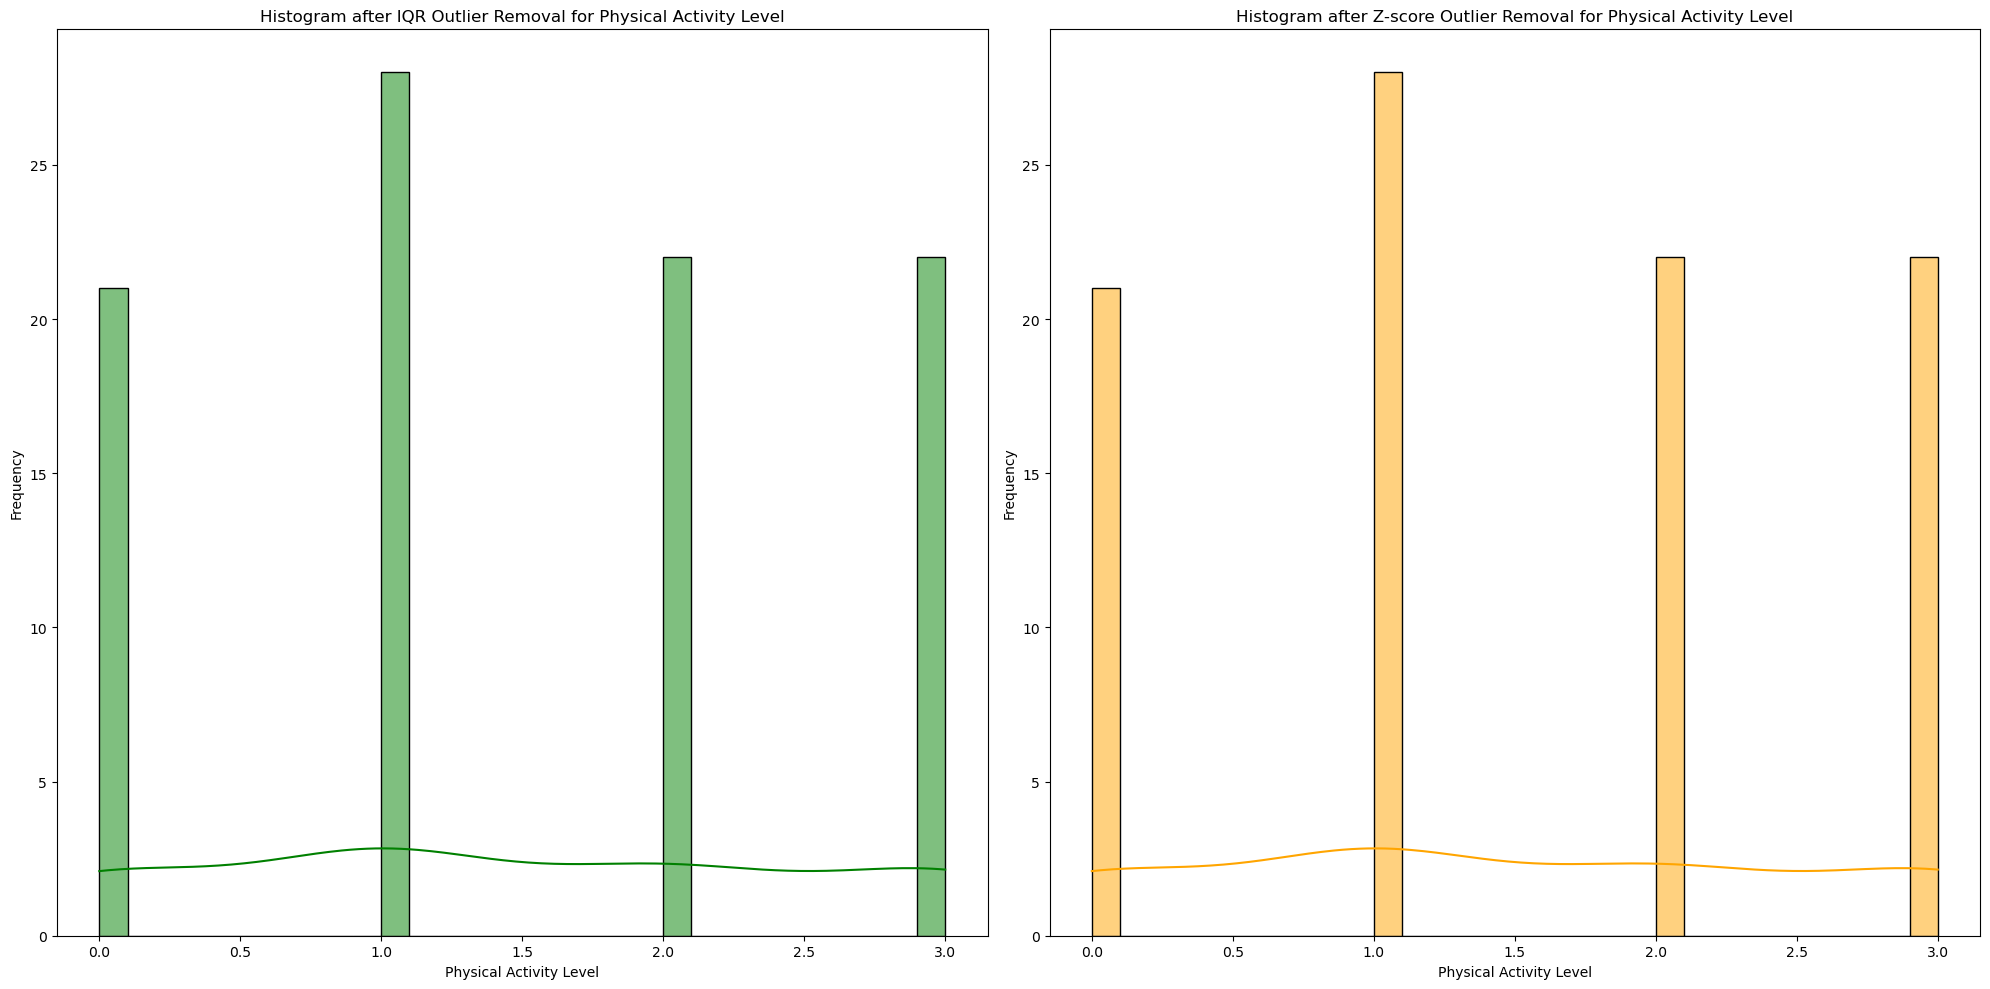

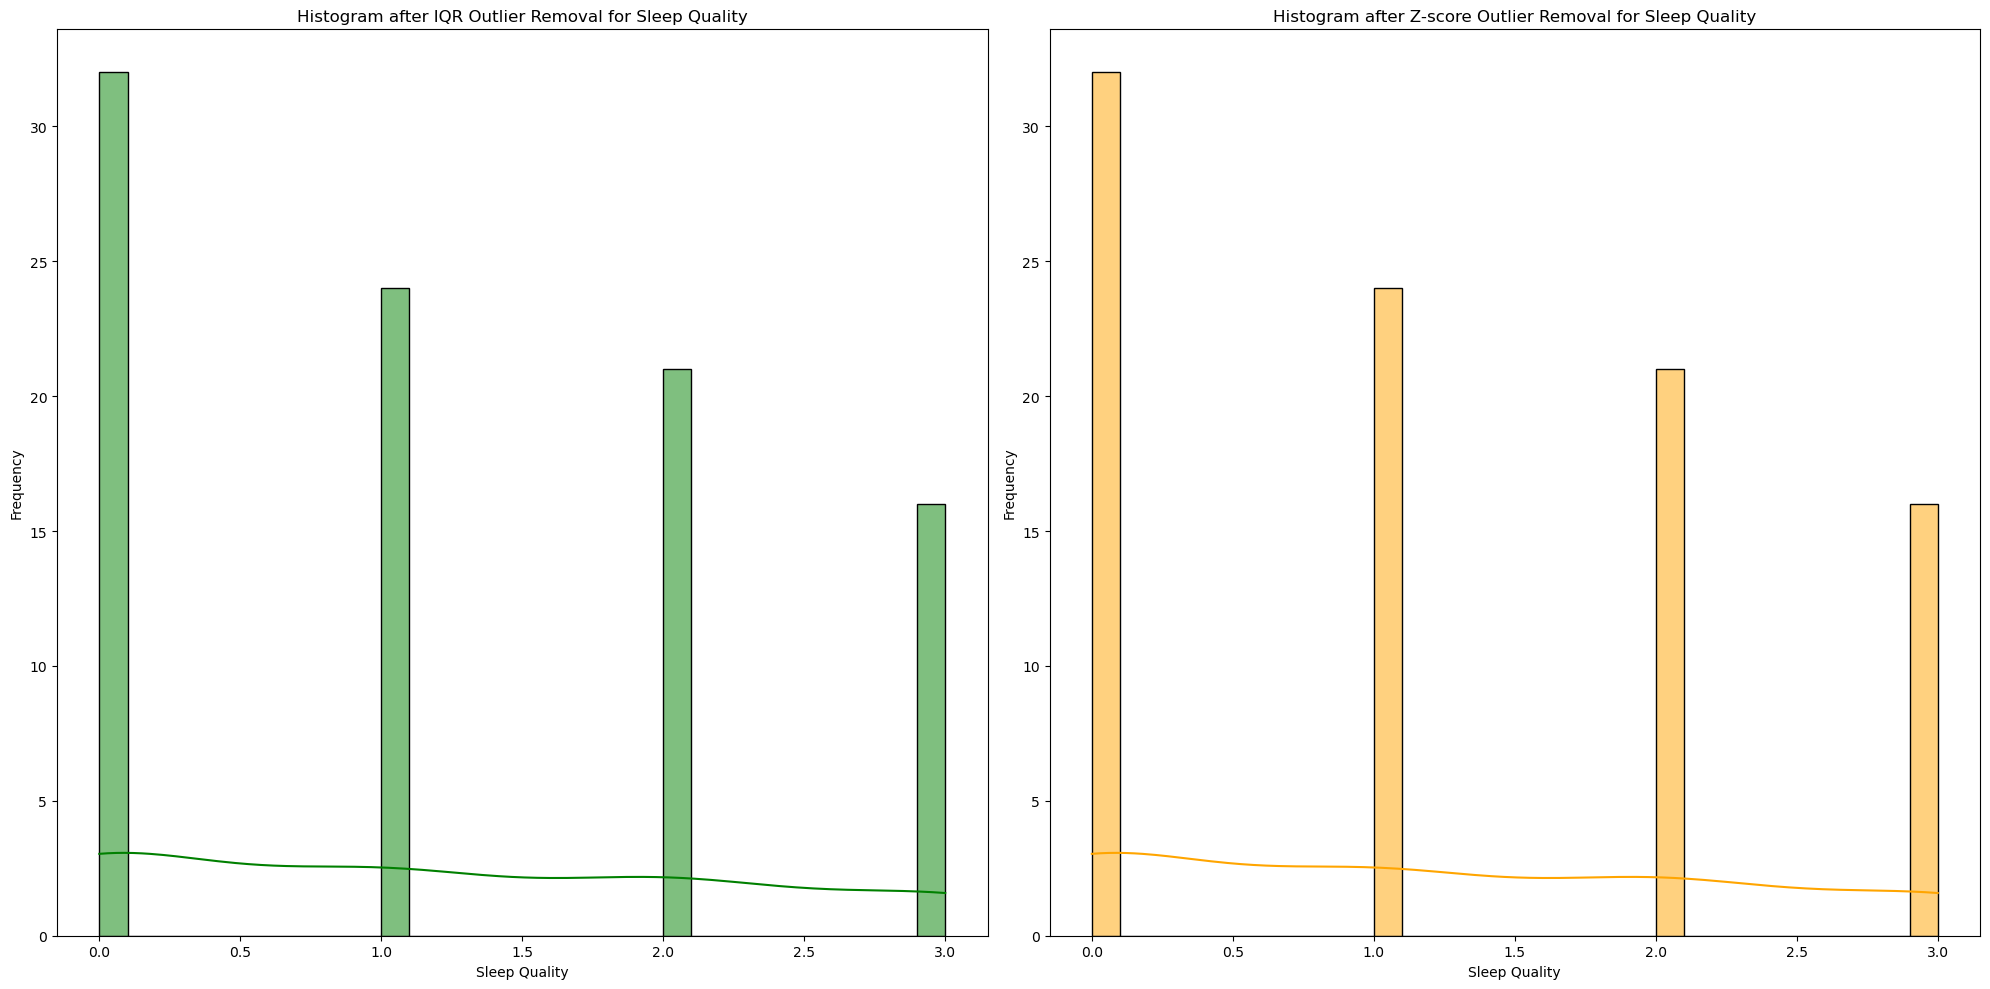

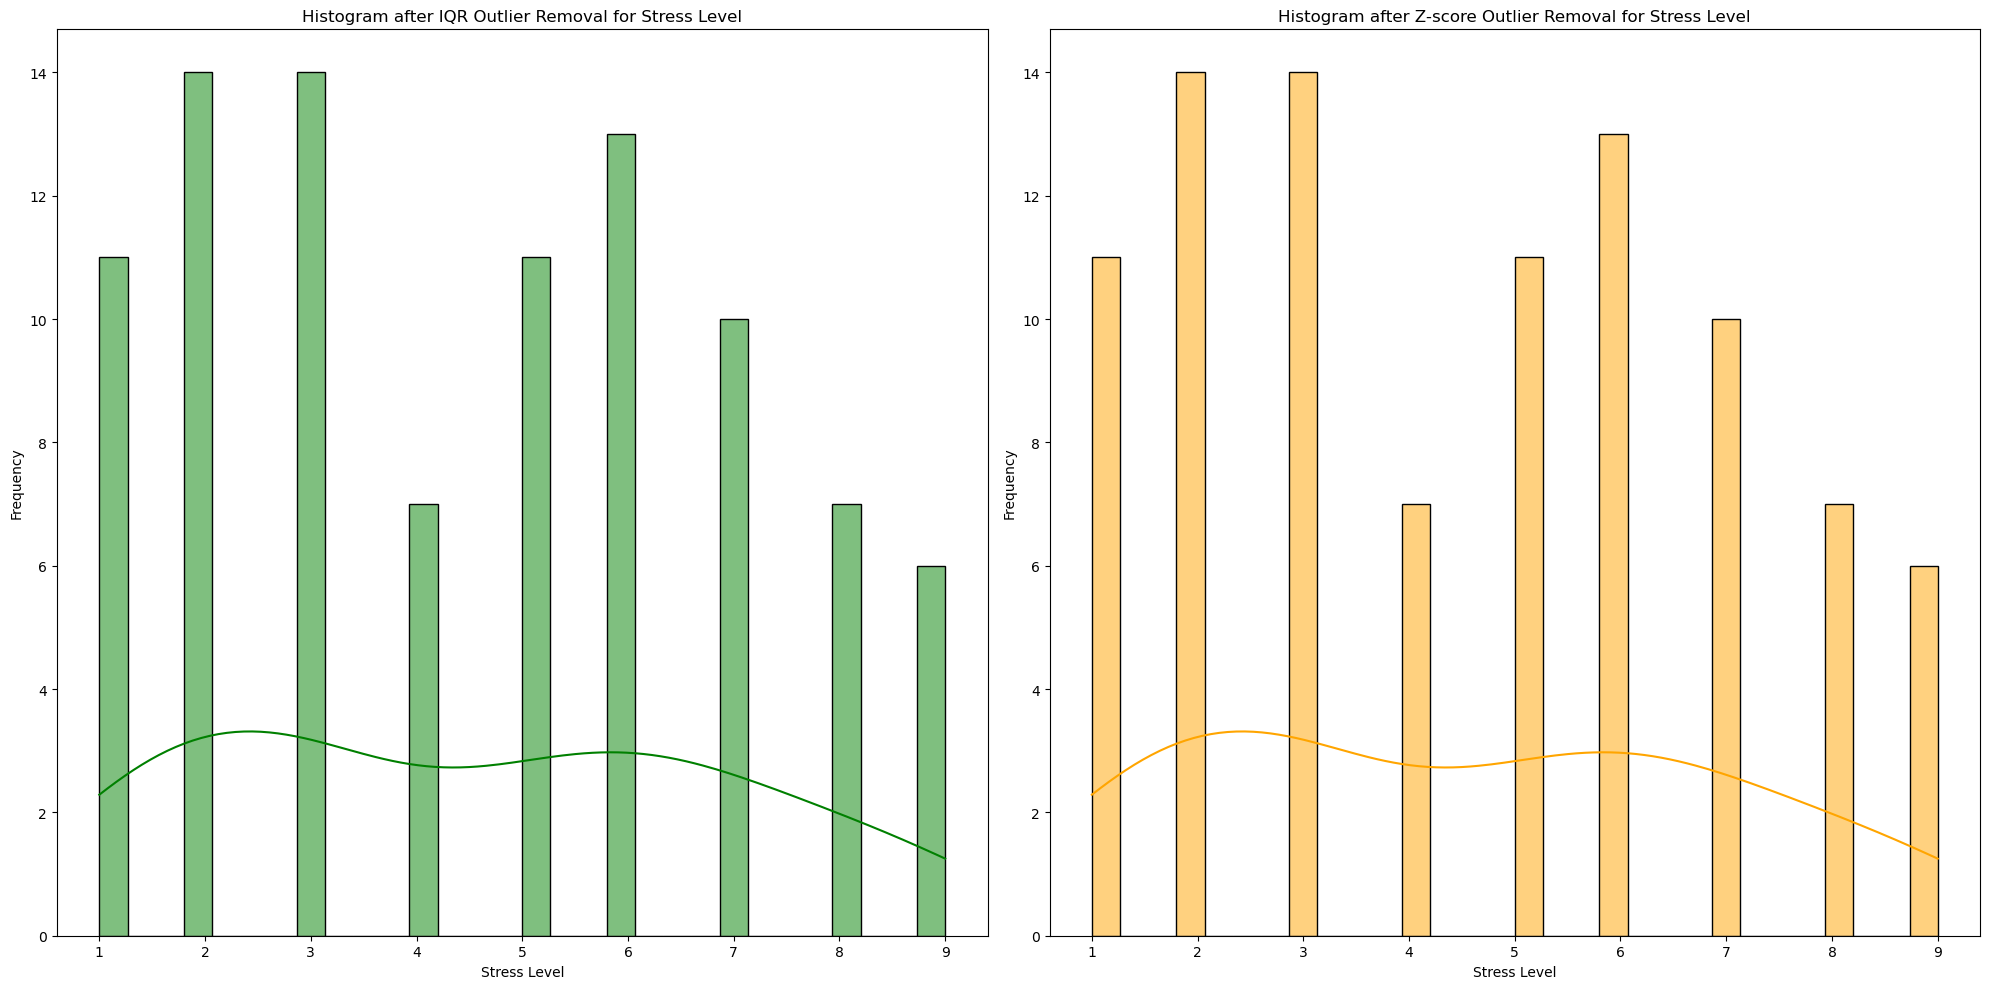

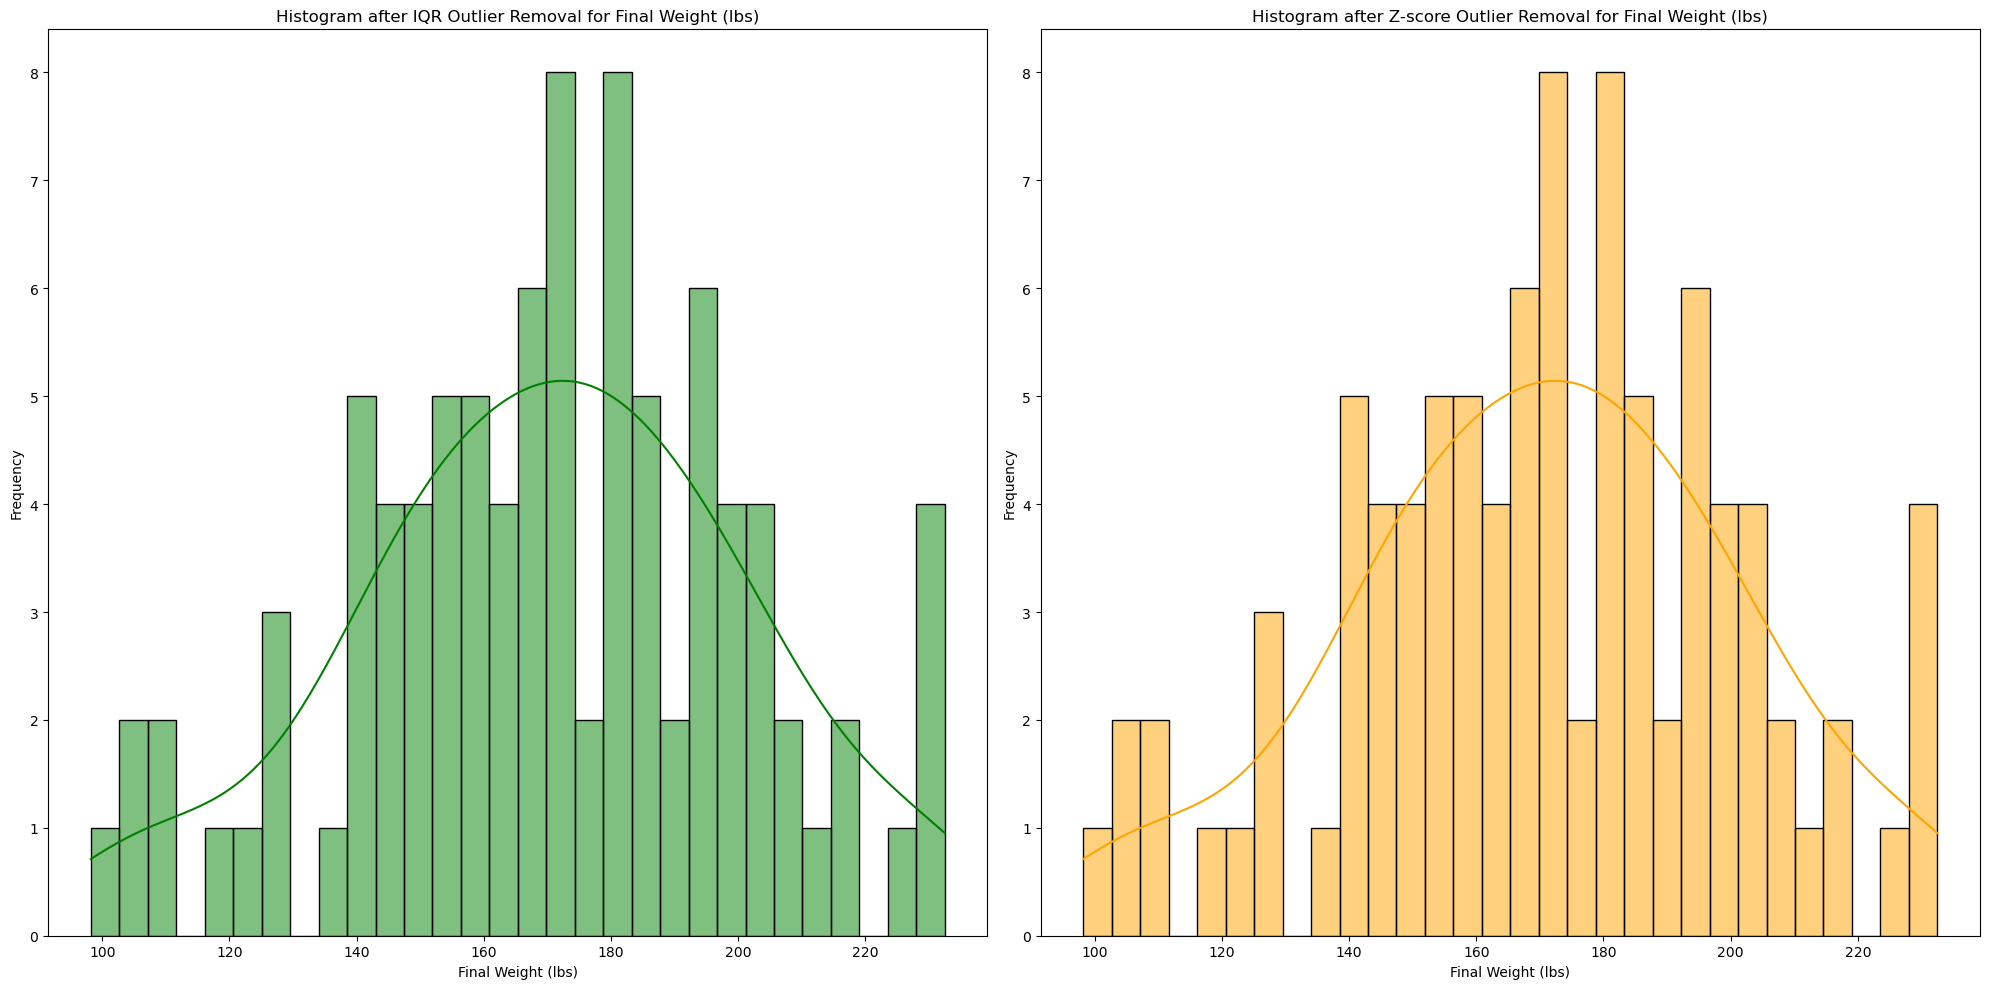

In [190]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Функция для поиска выбросов методом IQR
def find_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5 * IQR)
    upper_bound = Q3 + (1.5 * IQR)
    return (data < lower_bound) | (data > upper_bound)

# Функция для поиска выбросов методом Z-оценки
def find_outliers_zscore(data, threshold=3):## отправляем маску
    z_scores = np.abs(stats.zscore(data))
    return z_scores > threshold

for column in ['Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)',
               'Duration (weeks)', 'Physical Activity Level', 'Sleep Quality', 'Stress Level', 'Final Weight (lbs)']:
    
    outliers_iqr = find_outliers_iqr(df_encoded[column])
    filtered_iqr_df = df_encoded[~outliers_iqr]

    outliers_zscore = find_outliers_zscore(df_encoded[column])
    filtered_zscore_df = df_encoded[~outliers_zscore]

    combined_outliers = outliers_iqr | outliers_zscore
    remaining_indices = df_encoded[~combined_outliers].index
    df_encoded = df_encoded.loc[remaining_indices]

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))

    sns.histplot(filtered_iqr_df[column], kde=True, ax=axes[0], color='green', bins=30)
    axes[0].set_title(f'Histogram after IQR Outlier Removal for {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')

    sns.histplot(filtered_zscore_df[column], kde=True, ax=axes[1], color='orange', bins=30)
    axes[1].set_title(f'Histogram after Z-score Outlier Removal for {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')

    plt.tight_layout()
    plt.show()


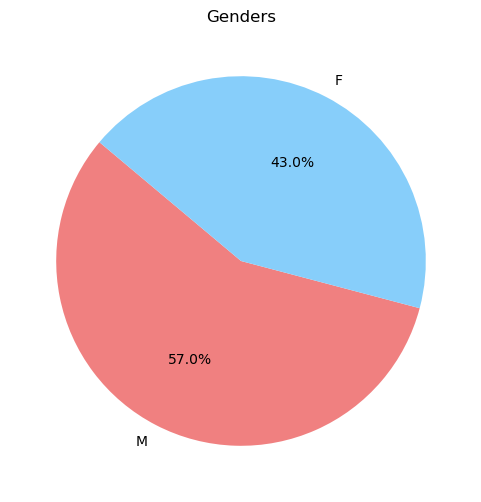

In [191]:
gender_counts = df['Gender'].value_counts()

fig, ax = plt.subplots(figsize=(6, 6))
ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])

ax.set_title('Genders')
plt.show()

In [192]:
df_encoded['Weight Change Rate'] = (df_encoded['Final Weight (lbs)'] - df_encoded['Current Weight (lbs)']) / df_encoded['Duration (weeks)']

bins = [0, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df_encoded['Age Group'] = pd.cut(df_encoded['Age'], bins=bins, labels=labels)

df_encoded['Stress Index'] = df_encoded['Stress Level'] * df_encoded['Sleep Quality']

df_encoded['Age * Physical Activity Level'] = df_encoded['Age'] * df_encoded['Physical Activity Level']

In [193]:
df_encoded.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,Sleep Quality,Stress Level,Final Weight (lbs),Weight Change Rate,Age Group,Stress Index,Age * Physical Activity Level
0,1,56,0,228.4,3102.3,3916.0,813.7,0.2,1,0,3,6,228.6,0.2,56-65,18,0
1,2,46,1,165.4,2275.5,3823.0,1547.5,2.4,6,3,3,6,167.8,0.4,46-55,18,138
2,3,32,1,142.8,2119.4,2785.4,666.0,1.4,7,0,2,3,144.2,0.2,26-35,6,0
3,4,25,1,145.5,2181.3,2587.3,406.0,0.8,8,0,1,2,146.3,0.1,18-25,2,0
4,5,38,0,155.5,2463.8,3312.8,849.0,2.0,10,1,2,1,157.5,0.2,36-45,2,38


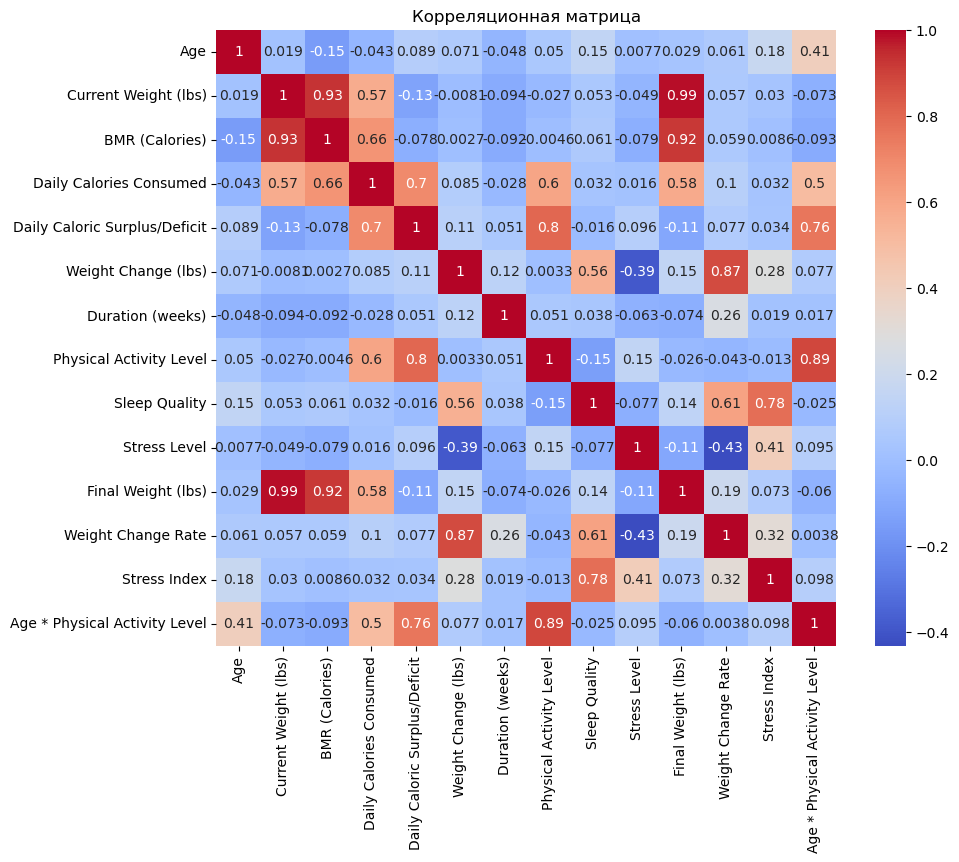

In [194]:
correlation = df_encoded[['Age', 'Current Weight (lbs)', 'BMR (Calories)', 'Daily Calories Consumed', 'Daily Caloric Surplus/Deficit', 'Weight Change (lbs)',
                  'Duration (weeks)', 'Physical Activity Level', 'Sleep Quality', 'Stress Level', 'Final Weight (lbs)',
                  'Weight Change Rate', 'Stress Index', 'Age * Physical Activity Level']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()

In [195]:
df_encoded = pd.get_dummies(df_encoded, columns=['Age Group'])

boolean_like_columns = df_encoded.select_dtypes(include=['bool']).columns
for column in boolean_like_columns:
    df_encoded[column] = df_encoded[column].map({True: 1, False: 0})
df_encoded.head()

df_encoded.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,...,Final Weight (lbs),Weight Change Rate,Stress Index,Age * Physical Activity Level,Age Group_18-25,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+
0,1,56,0,228.4,3102.3,3916.0,813.7,0.2,1,0,...,228.6,0.2,18,0,0,0,0,0,1,0
1,2,46,1,165.4,2275.5,3823.0,1547.5,2.4,6,3,...,167.8,0.4,18,138,0,0,0,1,0,0
2,3,32,1,142.8,2119.4,2785.4,666.0,1.4,7,0,...,144.2,0.2,6,0,0,1,0,0,0,0
3,4,25,1,145.5,2181.3,2587.3,406.0,0.8,8,0,...,146.3,0.1,2,0,1,0,0,0,0,0
4,5,38,0,155.5,2463.8,3312.8,849.0,2.0,10,1,...,157.5,0.2,2,38,0,0,1,0,0,0


In [196]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_encoded.drop(['Participant ID', 'Weight Change (lbs)', 'Final Weight (lbs)'], axis=1)  
y = df_encoded['Weight Change (lbs)'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

In [197]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Linear Regression Evaluation:")
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Linear Regression Evaluation:
Mean Absolute Error: 2.3375
Mean Squared Error: 9.5134
Root Mean Squared Error: 3.0844


Mean Squared Error: 22.44


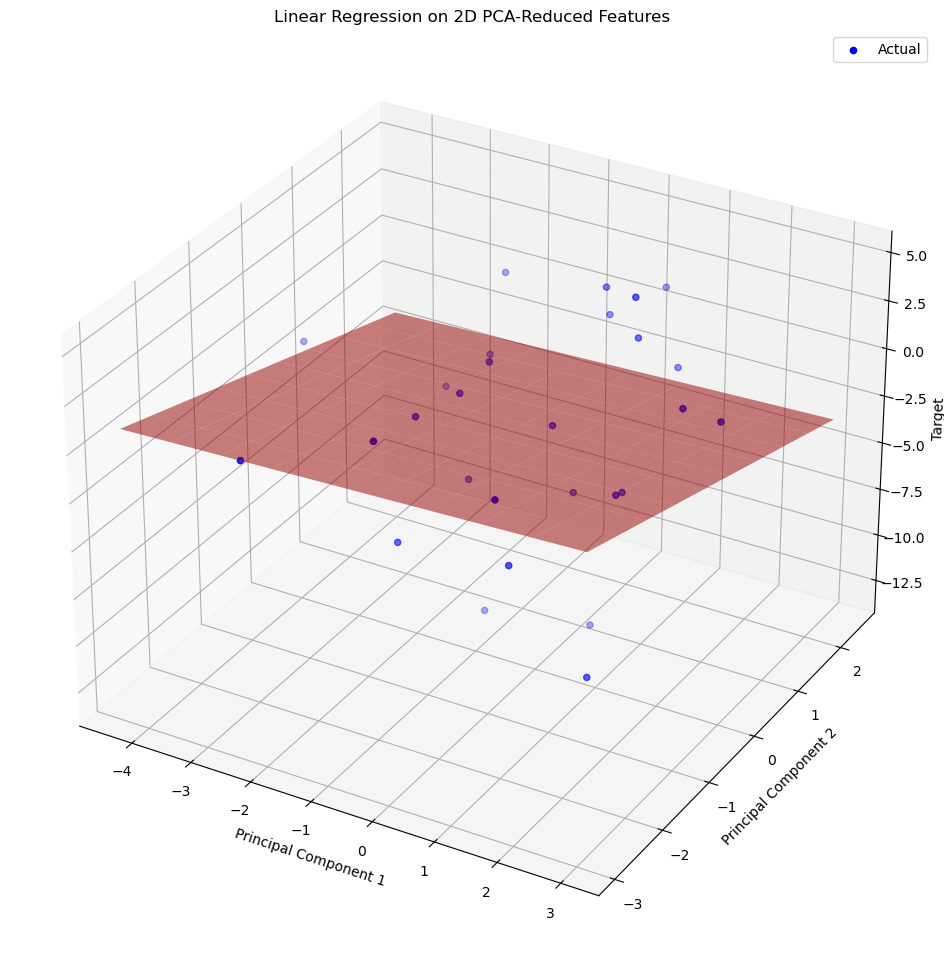

In [198]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model = LinearRegression()
model.fit(X_train_pca, y_train)

y_pred = model.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

fig = plt.figure(figsize=(18, 12))  
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], y_test, color='blue', label='Actual')

x_surf, y_surf = np.meshgrid(np.linspace(X_test_pca[:, 0].min(), X_test_pca[:, 0].max(), 10),
                             np.linspace(X_test_pca[:, 1].min(), X_test_pca[:, 1].max(), 10))
z_surf = model.predict(np.c_[x_surf.ravel(), y_surf.ravel()]).reshape(x_surf.shape)

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Target')
ax.set_title('Linear Regression on 2D PCA-Reduced Features')
plt.legend()
plt.show()


In [199]:
print("Linear Regression Evaluation:")
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}')
print(f'Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}')

Linear Regression Evaluation:
Mean Absolute Error: 3.7008
Mean Squared Error: 22.4363
Root Mean Squared Error: 4.7367


In [200]:
from sklearn.calibration import LabelEncoder

def categorize(value):
    if value < -2:
        return 'Weight Loss'
    elif -2 <= value <= 2:
        return 'No Change'
    else:
        return 'Weight Gain'

df_encoded['Weight Change Category'] = df_encoded['Weight Change (lbs)'].apply(categorize)

encoder = LabelEncoder()
df_encoded['Weight Change Category Encoded'] = encoder.fit_transform(df_encoded['Weight Change Category'])

In [201]:
df_encoded.head()

,Participant ID,Age,Gender,Current Weight (lbs),BMR (Calories),Daily Calories Consumed,Daily Caloric Surplus/Deficit,Weight Change (lbs),Duration (weeks),Physical Activity Level,...,Stress Index,Age * Physical Activity Level,Age Group_18-25,Age Group_26-35,Age Group_36-45,Age Group_46-55,Age Group_56-65,Age Group_65+,Weight Change Category,Weight Change Category Encoded
0,1,56,0,228.4,3102.3,3916.0,813.7,0.2,1,0,...,18,0,0,0,0,0,1,0,No Change,0
1,2,46,1,165.4,2275.5,3823.0,1547.5,2.4,6,3,...,18,138,0,0,0,1,0,0,Weight Gain,1
2,3,32,1,142.8,2119.4,2785.4,666.0,1.4,7,0,...,6,0,0,1,0,0,0,0,No Change,0
3,4,25,1,145.5,2181.3,2587.3,406.0,0.8,8,0,...,2,0,1,0,0,0,0,0,No Change,0
4,5,38,0,155.5,2463.8,3312.8,849.0,2.0,10,1,...,2,38,0,0,1,0,0,0,No Change,0


In [202]:
X_clf = df_encoded.drop(['Participant ID', 'Weight Change (lbs)', 'Weight Change Category',
                           'Weight Change Category Encoded', 'Final Weight (lbs)'], axis=1)
y_clf = df_encoded['Weight Change Category Encoded']

X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(X_clf, y_clf, test_size=0.2,
                                                                    random_state=42, stratify=y_clf)

scaler = StandardScaler()
X_train_scaled_clf = scaler.fit_transform(X_train_clf)
X_test_scaled_clf = scaler.transform(X_test_clf)

Accuracy: 0.7368


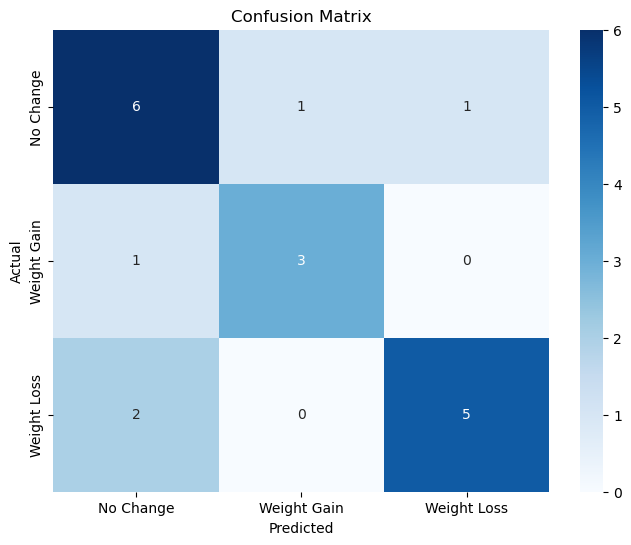


Classification Report:
              precision    recall  f1-score   support

   No Change       0.67      0.75      0.71         8
 Weight Gain       0.75      0.75      0.75         4
 Weight Loss       0.83      0.71      0.77         7

    accuracy                           0.74        19
   macro avg       0.75      0.74      0.74        19
weighted avg       0.75      0.74      0.74        19


Cross-validation scores: [0.89473684 0.84210526 0.83333333 0.83333333]
Mean CV score: 0.8509


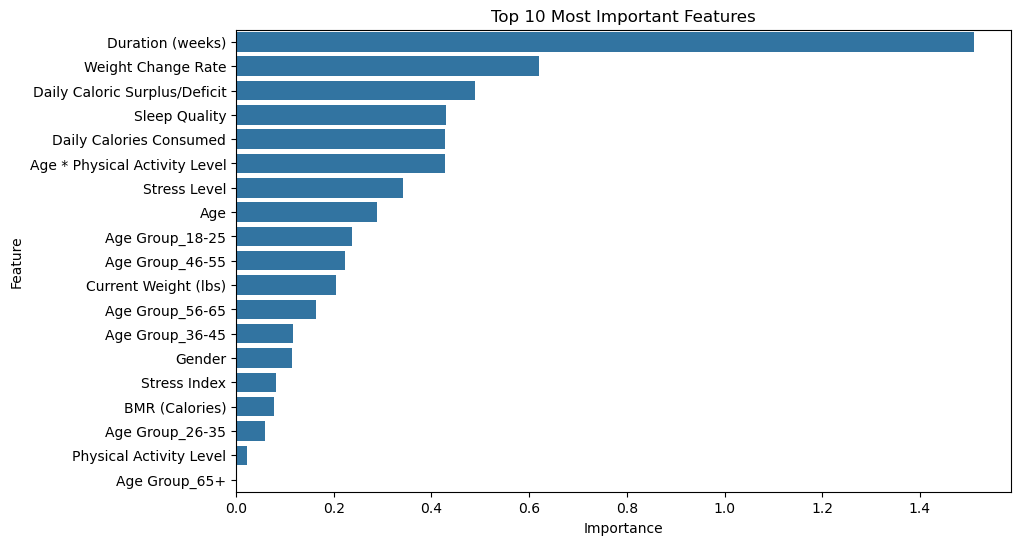

In [214]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_scaled_clf, y_train_clf)

y_pred_clf = model_lr.predict(X_test_scaled_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=encoder.classes_))

cv_scores = cross_val_score(model_lr, X_train_scaled_clf, y_train_clf, cv=4)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(model_lr.coef_[0])})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy: 0.9474


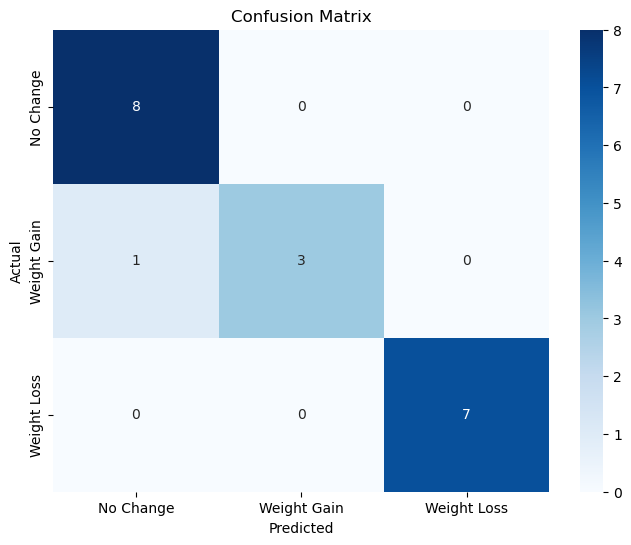


Classification Report:
              precision    recall  f1-score   support

   No Change       0.89      1.00      0.94         8
 Weight Gain       1.00      0.75      0.86         4
 Weight Loss       1.00      1.00      1.00         7

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.93        19
weighted avg       0.95      0.95      0.95        19


Cross-validation scores: [0.84210526 0.63157895 0.77777778 0.66666667]
Mean CV score: 0.7295


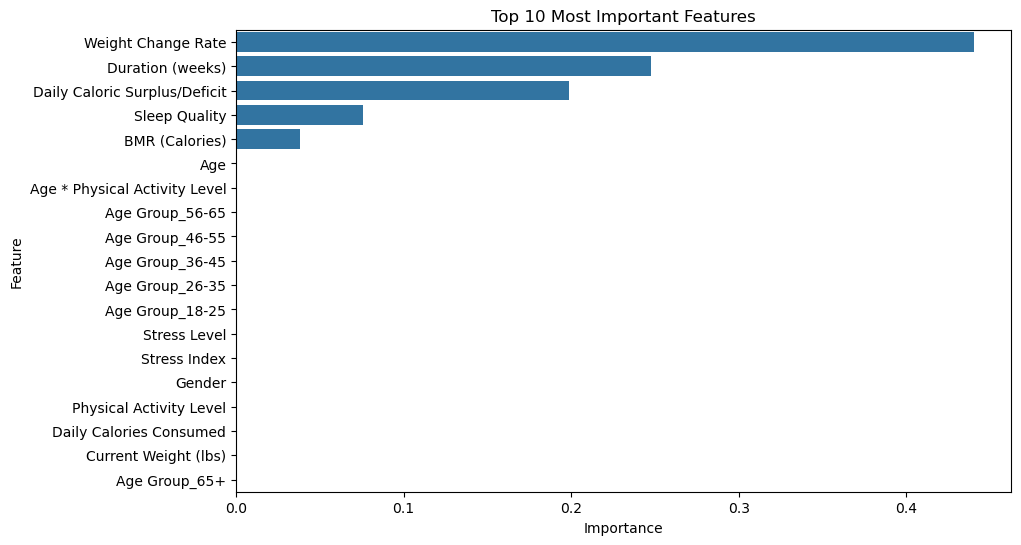

In [209]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=10)
dt_model.fit(X_train_scaled_clf, y_train_clf)

y_pred_clf = dt_model.predict(X_test_scaled_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=encoder.classes_))

cv_scores = cross_val_score(dt_model, X_train_scaled_clf, y_train_clf, cv=4)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': dt_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy: 0.7895


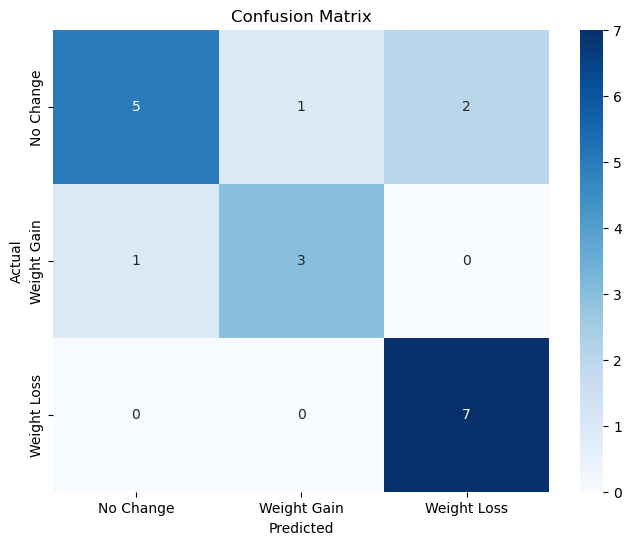


Classification Report:
              precision    recall  f1-score   support

   No Change       0.83      0.62      0.71         8
 Weight Gain       0.75      0.75      0.75         4
 Weight Loss       0.78      1.00      0.88         7

    accuracy                           0.79        19
   macro avg       0.79      0.79      0.78        19
weighted avg       0.80      0.79      0.78        19


Cross-validation scores: [0.84210526 0.73684211 0.88888889 0.77777778]
Mean CV score: 0.8114


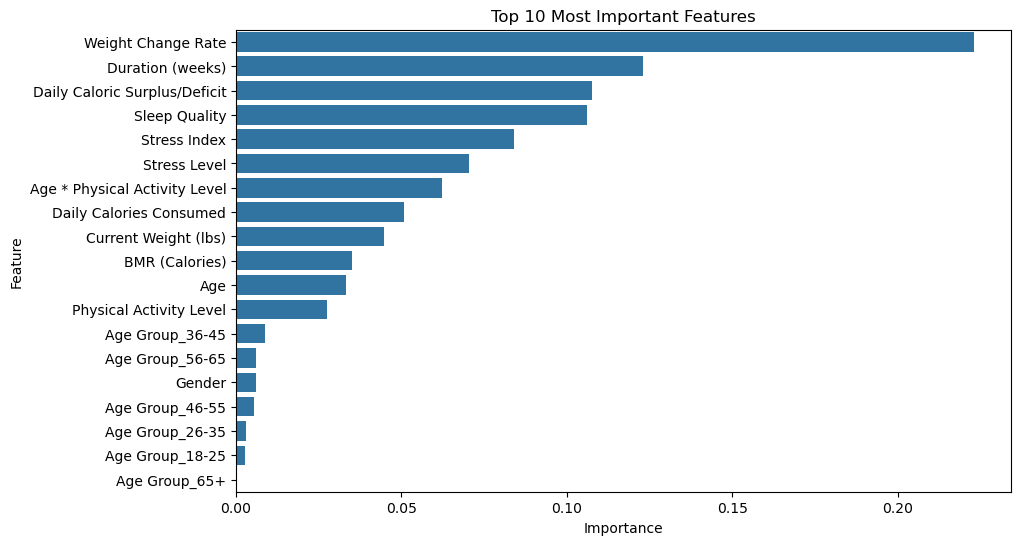

In [213]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, n_jobs=1)
rf_model.fit(X_train_scaled_clf, y_train_clf)

y_pred_clf = rf_model.predict(X_test_scaled_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=encoder.classes_))

cv_scores = cross_val_score(rf_model, X_train_scaled_clf, y_train_clf, cv=4)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy: 0.9474


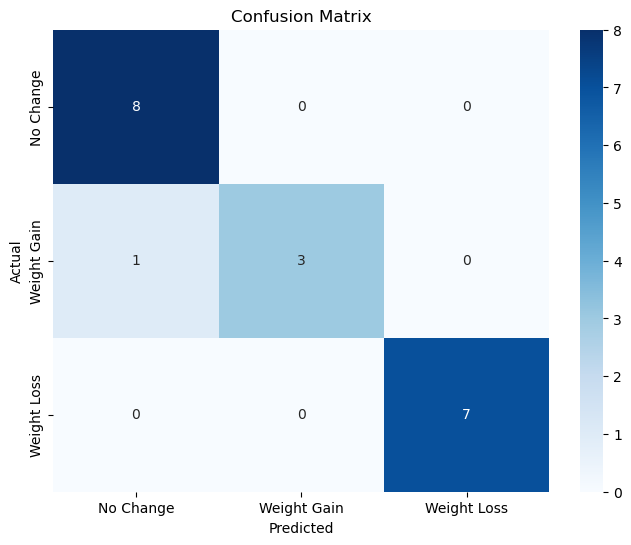


Classification Report:
              precision    recall  f1-score   support

   No Change       0.89      1.00      0.94         8
 Weight Gain       1.00      0.75      0.86         4
 Weight Loss       1.00      1.00      1.00         7

    accuracy                           0.95        19
   macro avg       0.96      0.92      0.93        19
weighted avg       0.95      0.95      0.95        19


Cross-validation scores: [1.         0.73684211 0.88888889 0.66666667]
Mean CV score: 0.8231


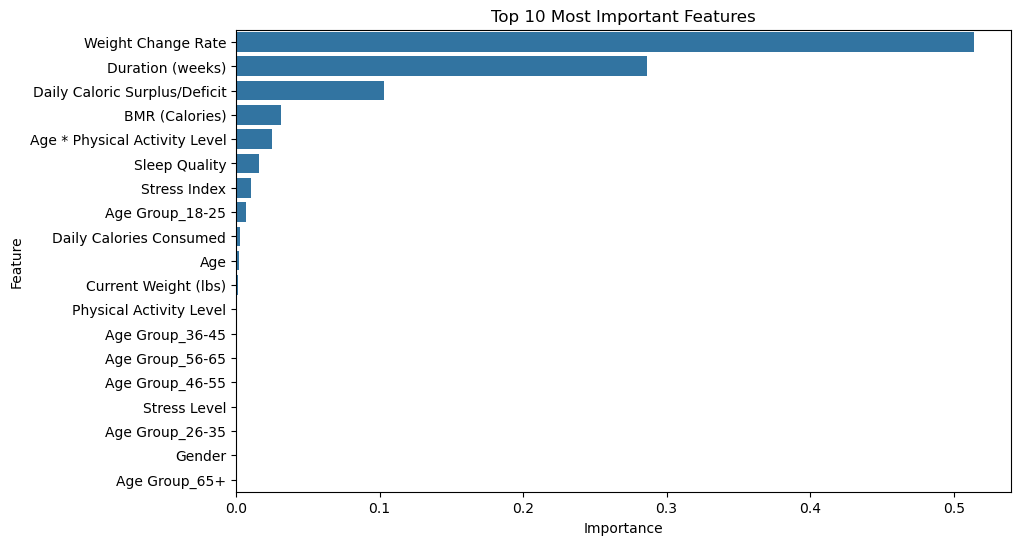

In [215]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train_scaled_clf, y_train_clf)

y_pred_clf = gb_model.predict(X_test_scaled_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=encoder.classes_))

cv_scores = cross_val_score(gb_model, X_train_scaled_clf, y_train_clf, cv=4)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': gb_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(30))
plt.title('Top 10 Most Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

Accuracy: 0.6842


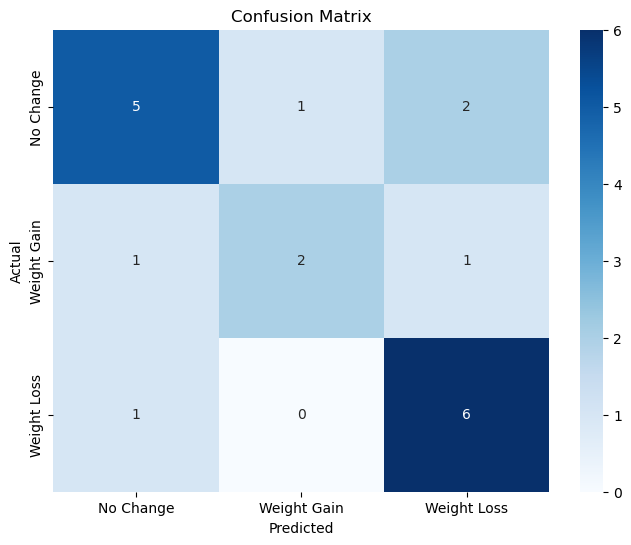


Classification Report:
              precision    recall  f1-score   support

   No Change       0.71      0.62      0.67         8
 Weight Gain       0.67      0.50      0.57         4
 Weight Loss       0.67      0.86      0.75         7

    accuracy                           0.68        19
   macro avg       0.68      0.66      0.66        19
weighted avg       0.69      0.68      0.68        19


Cross-validation scores: [0.78947368 0.84210526 0.66666667 0.72222222]
Mean CV score: 0.7551


In [217]:
from sklearn import svm

svm_model = svm.SVC(random_state=42, kernel='rbf', C=1.0, probability=True)
svm_model.fit(X_train_scaled_clf, y_train_clf)

y_pred_clf = svm_model.predict(X_test_scaled_clf)

accuracy = accuracy_score(y_test_clf, y_pred_clf)
print(f"Accuracy: {accuracy:.4f}")

cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=encoder.classes_, yticklabels=encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test_clf, y_pred_clf, target_names=encoder.classes_))

cv_scores = cross_val_score(svm_model, X_train_scaled_clf, y_train_clf, cv=4)
print(f"\nCross-validation scores: {cv_scores}")
print(f"Mean CV score: {np.mean(cv_scores):.4f}")

In [220]:
models = [model_lr, dt_model, rf_model, gb_model, svm_model]

f1_scores = {}
for model in models:
    scores = cross_val_score(model, X_train_scaled_clf, y_train_clf, cv=5, scoring='f1_macro') 
    f1_scores[type(model).__name__] = np.mean(scores)

for model_name, score in f1_scores.items():
    print(f"{model_name}: Mean F1 Score = {score:.4f}")

best_model_name = max(f1_scores, key=f1_scores.get)
print(f"\nBest Model: {best_model_name} with F1 Score = {f1_scores[best_model_name]:.4f}")

LogisticRegression: Mean F1 Score = 0.8123
DecisionTreeClassifier: Mean F1 Score = 0.7879
RandomForestClassifier: Mean F1 Score = 0.8107
GradientBoostingClassifier: Mean F1 Score = 0.8930
SVC: Mean F1 Score = 0.7029

Best Model: GradientBoostingClassifier with F1 Score = 0.8930


# Инсайты по факторам потери веса

## Ключевые выводы

1. **Калорийный дефицит и избыток**:
   - Анализ показывает, что **калорийный дефицит** играет решающую роль в потере веса. Участники, которые поддерживали калорийный дефицит, с большей вероятностью испытывали значительную потерю веса.
   - Напротив, те, кто находился в **калорийном избытке**, склонны были набирать вес, что подчеркивает важность управления ежедневным потреблением калорий для эффективного контроля веса.

2. **Влияние качества сна**:
   - **Качество сна** оказалось значительным фактором, влияющим на потерю веса. Участники, которые сообщали о лучшем качестве сна, достигали более благоприятных результатов в потере веса.
   - Плохое качество сна было связано с трудностями в управлении весом, что указывает на то, что достаточный отдых необходим для достижения целей по снижению веса.

3. **Возрастной фактор**:
   - Интересно, что **возраст** не показал сильной корреляции с результатами потери веса. Хотя возраст часто рассматривается как фактор, влияющий на метаболизм и управление весом, данные показывают, что он может не быть столь же влиятельным, как другие факторы, такие как потребление калорий и качество сна.

4. **Потребление калорий**:
   - Анализ указывает на то, что **потребление калорий** само по себе не оказывает значительного влияния на потерю веса. Участники с аналогичными уровнями потребления калорий демонстрировали различные результаты по снижению веса, что предполагает, что другие факторы образа жизни играют более критическую роль.

## Заключение

В заключение, результаты подчеркивают, что **калорийный дефицит** и **качество сна** являются ключевыми для достижения потери веса, в то время как **возраст** и **потребление калорий** имеют меньшее влияние. Этот вывод может помочь людям и специалистам в области здравоохранения в разработке эффективных стратегий управления весом, которые акцентируют внимание на контроле калорий и важности качественного сна.

# Важность полноты (Recall)

В проекте предсказания изменения веса полнота (recall) часто является более важным показателем, чем точность (accuracy). Это связано с несколькими факторами:

1. **Идентификация рисковых групп**: Высокая полнота позволяет более эффективно выявлять людей, которые находятся под риском набора веса. Это особенно важно, поскольку пропуск таких случаев может привести к серьезным последствиям для здоровья.

2. **Цена ложных отрицательных результатов**: В ситуациях, когда пропуск положительного случая (например, не выявление человека, который набирает вес) может иметь серьезные последствия, полнота становится критически важной. Важно минимизировать количество людей, которые не были правильно идентифицированы как находящиеся в группе риска.

3. **Балансировка метрик**: Хотя точность также важна, в контексте здравоохранения и предсказания веса, полнота часто имеет приоритет, поскольку она помогает обеспечить, что как можно больше людей, нуждающихся в помощи, будет выявлено.

Таким образом, в проектах, связанных с предсказанием изменения веса, полнота (recall) является более важным показателем, чем точность (accuracy).